In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [3]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

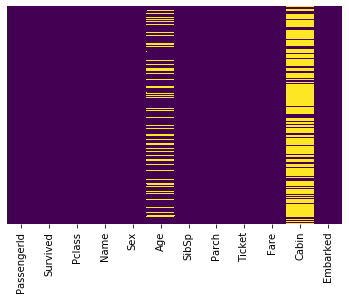

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
sns.set_style9('whitegrid)

SyntaxError: EOL while scanning string literal (<ipython-input-10-11644aba9016>, line 1)

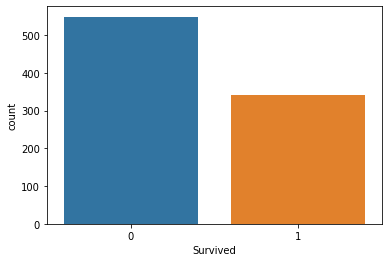

In [12]:
sns.countplot(x='Survived',data=train)

In [16]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

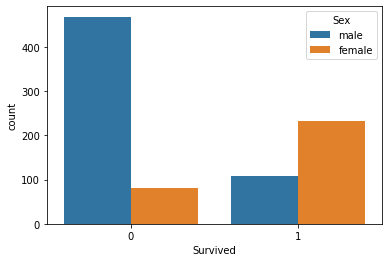

In [20]:
sns.countplot(x='Survived',hue='Sex',data=train)

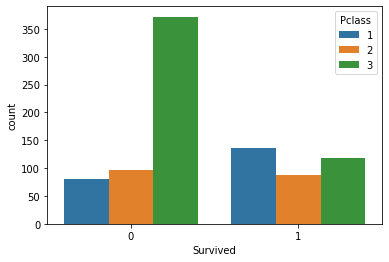

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=train)

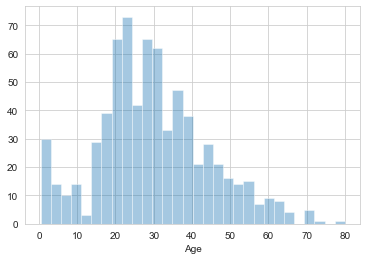

In [23]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

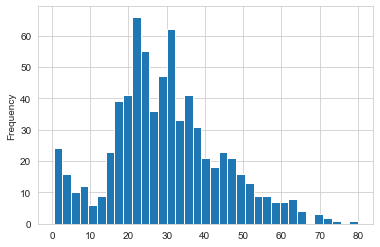

In [24]:
train['Age'].plot.hist(bins=35)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


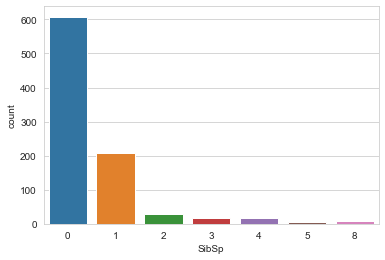

In [26]:
sns.countplot(x='SibSp',data=train)

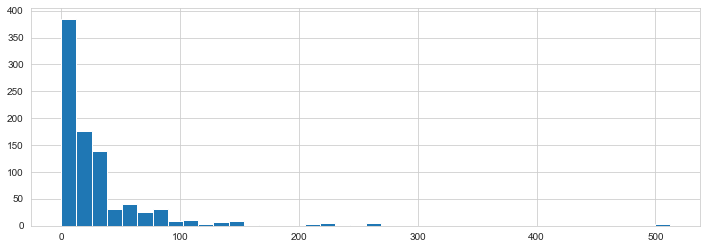

In [28]:
train['Fare'].hist(bins=40,figsize=(12,4))

In [30]:
import cufflinks as cf

cf.go_offline()

In [35]:
train['Fare'].iplot(kind='hist',bins=50)

In [36]:
train['Age'].iplot(kind='hist',bins=50)

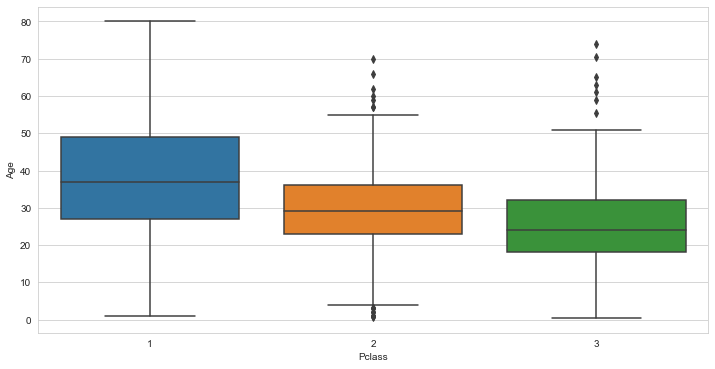

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [52]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [57]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [58]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [60]:
train['Age'].isnull().sum()

0

In [61]:
train.drop('Cabin',axis=1,inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
train.dropna(inplace=True)

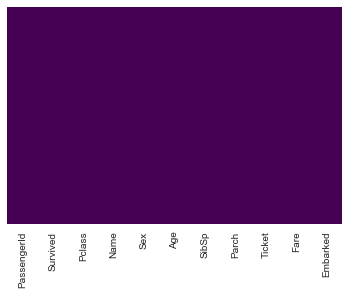

In [64]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [68]:
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [69]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [70]:
train= pd.concat([train,sex,embark],axis=1)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [72]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
X= train.drop('Survived',axis=1)
y=train['Survived']

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_model= LogisticRegression()

In [79]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions= log_model.predict(X_test)

In [81]:
print(predictions)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


In [82]:
from sklearn.metrics import classification_report


In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [88]:
log_model_rs= LogisticRegression(random_state=0)
log_model_rs.fit(X_train,y_train)
predictn= log_model.predict(X_test)

print(classification_report(y_test,predictn))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [134]:
test.head()
test_original=test.copy()

In [90]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

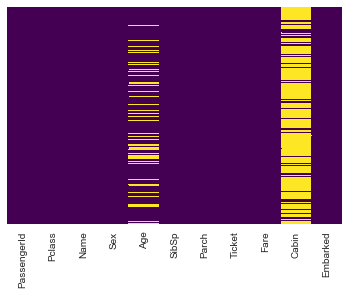

In [92]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
test['Age']= test[['Age','Pclass']].apply(impute_age,axis=1)

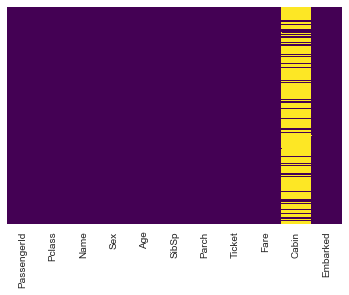

In [94]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
test.drop('Cabin',axis=1,inplace=True)

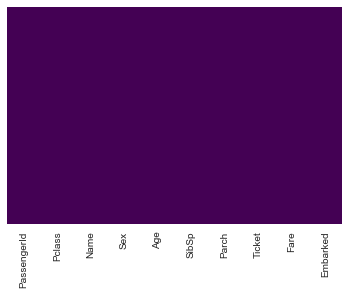

In [96]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
sex= pd.get_dummies(test['Sex'],drop_first=True)
embark= pd.get_dummies(test['Embarked'],drop_first=True)

In [98]:
test= pd.concat([test,sex,embark],axis=1)

In [99]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [101]:
test.dropna(inplace=True)

In [102]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [103]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
male           0
Q              0
S              0
dtype: int64

In [104]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [105]:
test.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [106]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
X= train.drop('Survived',axis=1)
y=train['Survived']

In [238]:
X=pd.get_dummies(X)

train=pd.get_dummies(train)

test=pd.get_dummies(test)

In [241]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.50,0,0,7.8292,1,1,0
1,893,3,47.00,1,0,7.0000,0,0,1
2,894,2,62.00,0,0,9.6875,1,1,0
3,895,3,27.00,0,0,8.6625,1,0,1
4,896,3,22.00,1,1,12.2875,0,0,1
5,897,3,14.00,0,0,9.2250,1,0,1
6,898,3,30.00,0,0,7.6292,0,1,0
7,899,2,26.00,1,1,29.0000,1,0,1
8,900,3,18.00,0,0,7.2292,0,0,0
9,901,3,21.00,2,0,24.1500,1,0,1


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [112]:
model_new= LogisticRegression()
model_new.fit(X_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [113]:
pred_tit=model_new.predict(X_test)

In [114]:
accuracy_score(y_test,pred_tit)

0.8202247191011236

In [115]:
pred_test=model_new.predict(test)

In [221]:
submission=pd.read_csv("gender_submission.csv")


In [222]:
submission.tail()
#submission.info()
submission.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [223]:
pred_test_df= pd.DataFrame({'Survived':pred_test})

In [224]:
pred_test_df.shape

(417, 1)

In [225]:

submission.fillna(0,inplace=True)

In [226]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [227]:
test.head()
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [228]:
submission['Survived']= pred_test_df
submission['PassengerId']=test['PassengerId']
submission.tail()

,PassengerId,Survived
413,1305.0,1.0
414,1306.0,0.0
415,1307.0,0.0
416,1308.0,0.0
417,1309.0,NaN


In [229]:
submission.fillna(0,inplace=True)


In [230]:
submission.tail()

,PassengerId,Survived
413,1305.0,1.0
414,1306.0,0.0
415,1307.0,0.0
416,1308.0,0.0
417,1309.0,0.0


In [231]:

submission.PassengerId=submission.PassengerId.astype(int)

submission.Survived=submission.Survived.astype(int)

In [232]:
submission.head(200)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [233]:
submission['PassengerId'].replace(0,1044,inplace=True)

In [234]:
submission.head(200)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [236]:
submission.to_csv('Titanic_final_submission.csv',index=False)


# finally done and submit on kaggle with 58% accuracy

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.25131086142322095


,PassengerId,Survived
413,1305.0,1.0
414,1306.0,0.0
415,1307.0,0.0
416,1308.0,0.0
417,1309.0,0.0


PassengerId    0
Survived       0
dtype: int64

(416, 2)